
# Amostragem e Estimativa: Teorema do Limite Central

A distribuição normal é muito útil devido ao TLC. Que na forma geral, em determinados casos (que inclui variância finita), mostra que **médias de amostras de observações de variáveis aleatórias independentes convergem na distribuição normal**, ou seja, elas se tornam normalmente distribuídas quando um número de observações é suficientemente grande.

In [1]:
from scipy.stats import bernoulli, norm
import random
import numpy as np
import matplotlib.pyplot as plt

### Gerar dados aleatórios

In [2]:
# p=0.5 moeda justa
bernoulli.rvs(p=0.5,size=10)

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

### Moeda viciada em coroa, p=0.2 para cara

In [3]:
# p=0.2 mais coroa (0) que cara (1)
bernoulli.rvs(p=0.2,size=20)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Moeda viciada em cara, p=0.8 para cara

In [4]:
# p=0.8 mais caras (1) que coroa (0)
bernoulli.rvs(p=0.8,size=20)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Somente uma jogada ou um número pequeno de jogadas, pode não produzir a distribuição esperada de 1 e 0

Exemplo, se tivermos $p=0.5$, podemos não obter metade 1 e metade 0 todas vezes que rodarmos o código.

Experimentos com $N$ numeros de tentativas para ver como a distribuição de probabilidade gradualmetne se centraliza em torno de 0.5

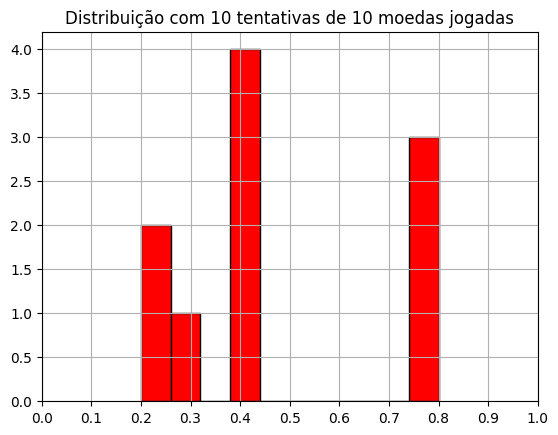

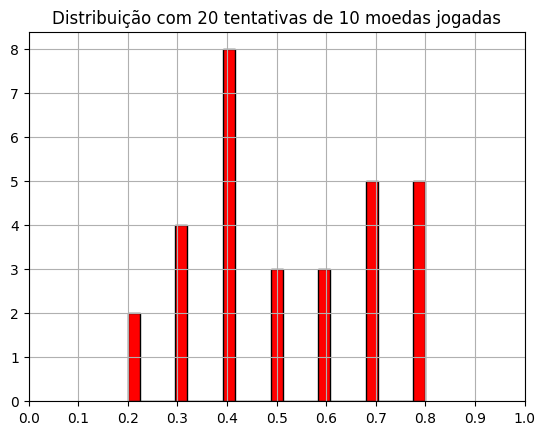

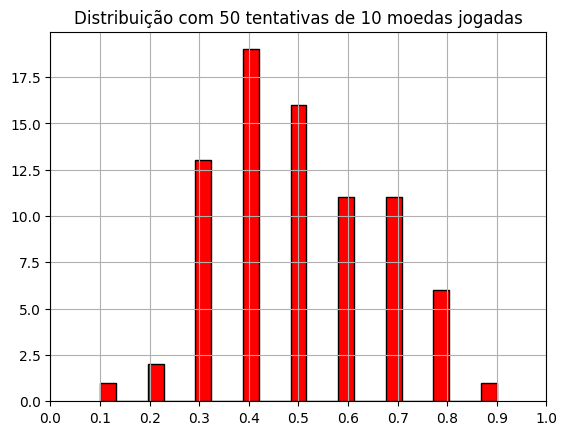

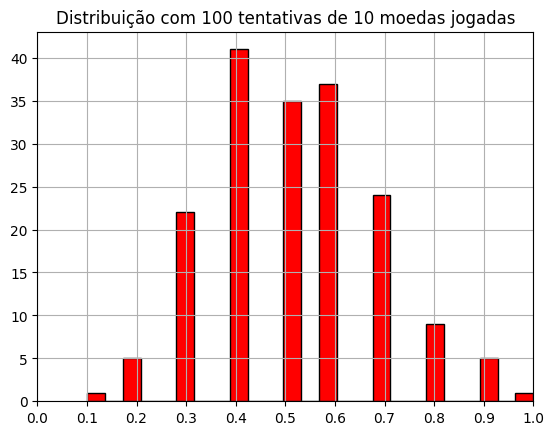

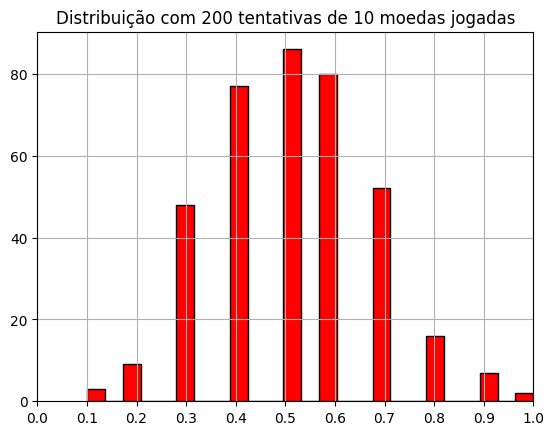

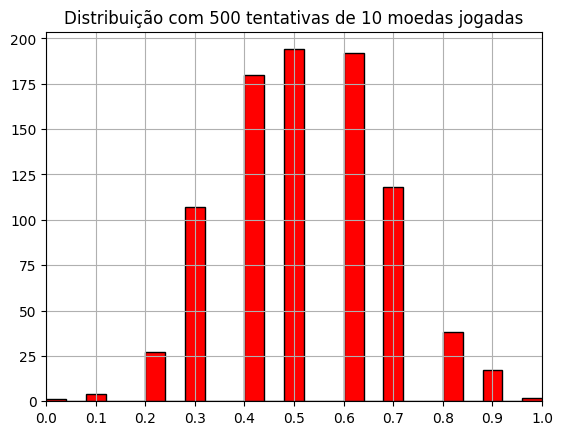

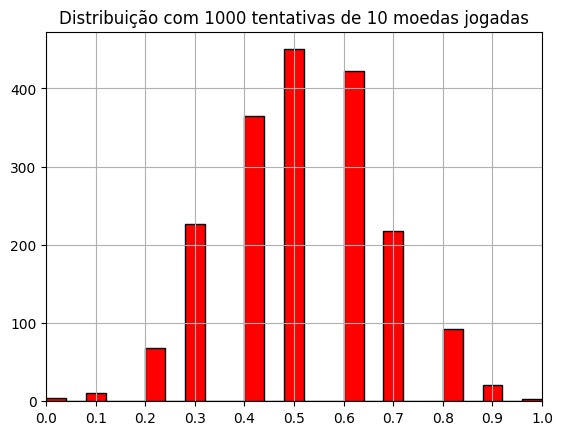

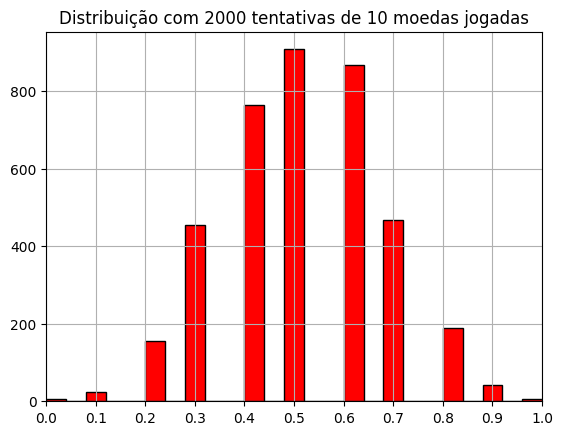

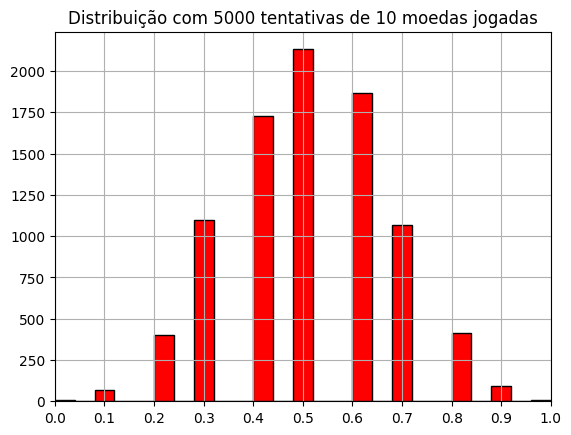

In [5]:
N_trials = [10,20,50,100,200,500,1000,2000,5000] # Número de tentativas
pr=0.5 # Probabilidade moeda justa
av = [] # para guardar a média média das variáveis

for i in N_trials:
    for n in range(1,i+1):
        av.append(np.mean(bernoulli.rvs(p=pr,size=10)))
    if (i==10):
        plt.title("Distribuição com {} tentativas de 10 moedas jogadas".format(i))
        plt.hist(av,bins=10,edgecolor='k',color='red')
        plt.xlim(0.0,1.0)
        plt.xticks([0.1*i for i in range(11)])
        plt.grid(True)
        plt.show()
    else:
        plt.title("Distribuição com {} tentativas de 10 moedas jogadas".format(i))
        plt.hist(av,bins=25,edgecolor='k',color='red')
        plt.xlim(0.0,1.0)
        plt.xticks([0.1*i for i in range(11)])
        plt.grid(True)
        plt.show()

Vamos gerar amostras aleatórias de números entre 0 e 10 e representar graficamente sua distribuição para diferentes tamanhos de amostra: n = 1, n = 10, n = 200 e n = 500.​

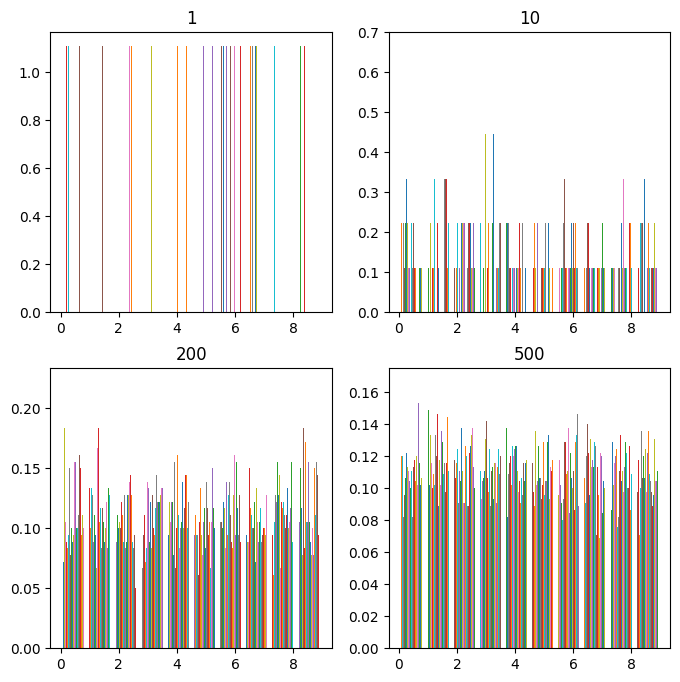

In [6]:
#Selecionar vários tamanhos para a amostra
num = [1, 10, 200, 500]
#lista com as médias
means = []
# Vamos gerar 1, 10, 200, 500 números aleatórios entre 0 e 10
# Calculamos a média
# Usamos a função seed de maneira que cada vez que se execute
# temos o mesmo resultado
for j in num:
	np.random.seed(20)
	x = [
		np.random.randint(
			0, 10, j) for _i in range(1000)]
	means.append(x)
k = 0
# Montar as quatro figuras
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
	for j in range(0, 2):
		# Histograma para cada x guardado em means
		ax[i, j].hist(means[k], 10, density = True)
		ax[i, j].set_title(label = num[k])
		k = k + 1
plt.show()

Em seguida calcularemos a média amostral para cada tamanho amostral e observaremos o comportamento de sua distribuição.

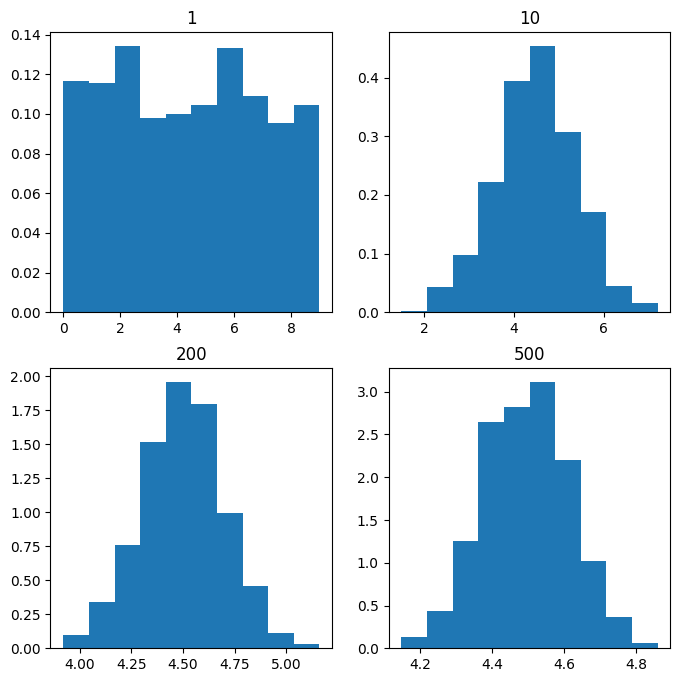

In [7]:
#Selecionar vários tamanhos para a amostra
num = [1, 10, 200, 500]
#lista com as médias
means = []
# Vamos gerar 1, 10, 200, 500 números aleatórios entre 0 e 10
# Calculamos a média
# Usamos a função seed de maneira que cada vez que se execute
# temos o mesmo resultado
for j in num:
	np.random.seed(20)
	x = [np.mean(
		np.random.randint(
			0, 10, j)) for _i in range(1000)]
	means.append(x)
k = 0
# Montar as quatro figuras
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
	for j in range(0, 2):
		# Histograma para cada x guardado em means
		ax[i, j].hist(means[k], 10, density = True)
		ax[i, j].set_title(label = num[k])
		k = k + 1
plt.show()

## Teorema do Limite Central
​​Para uma amostra aleatória de tamanho 𝒏 de uma população com média 𝝁 e desvio padrão 𝛔, a distribuição da média amostral $\bar{𝒙}$ possui uma média aproximadamente igual a média da população 𝝁 e um desvio padrão igual ao desvio padrão da população dividido pela raiz quadrada do tamanho da amostra, ou seja,

$$\frac{\sigma}{\sqrt{n}}$$

### Interpretação do TLC
Quando amostras de um tamanho específico são escolhidas de uma população, a distribuição das médias dessas amostras tende a seguir uma distribuição normal. Essa aproximação se torna mais precisa à medida que o tamanho das amostras aumenta.


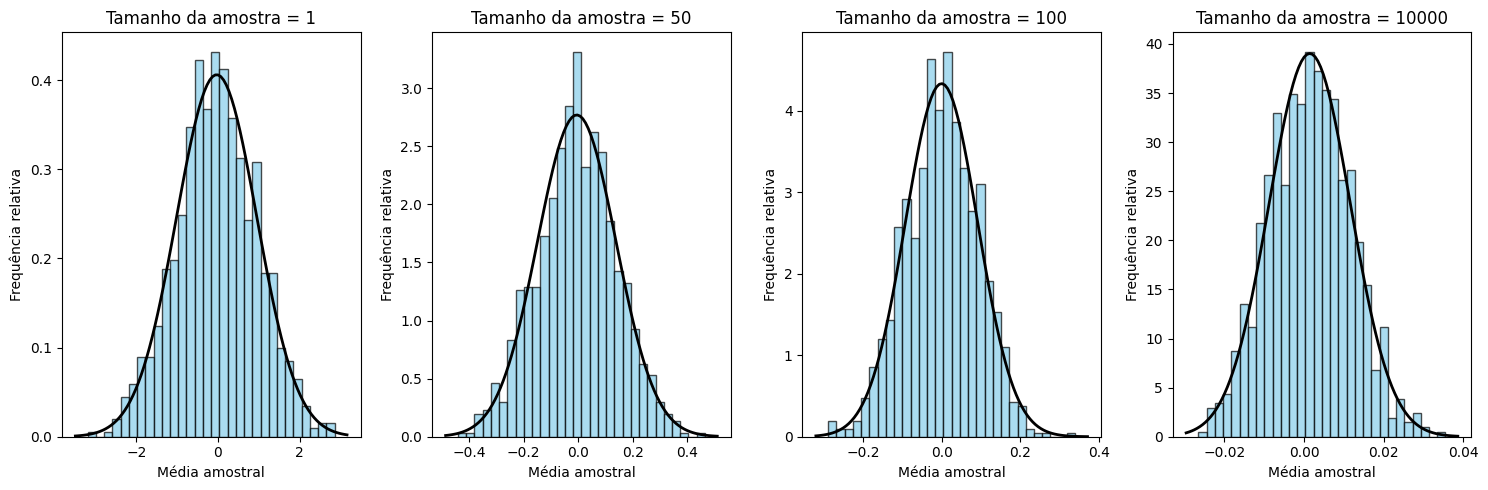

In [8]:
# Definir a população (podemos mudar para a distribuição que quisermos)
populacao = np.random.normal(loc=0, scale=1, size=100000)

# Função para gerar amostrar e calcular a média
def gerar_amostras(tamanho_amostra):
    medias_amostrais = [np.mean(np.random.choice(populacao, size=tamanho_amostra)) for _ in range(1000)]
    return medias_amostrais

# Tamanhos da amostra
tamanhos_amostra = [1, 50, 100, 10000]

# criar subgráficos
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Gerar gráficos para diferentes tamanhos da amostra
for i, n in enumerate(tamanhos_amostra):
    medias_amostrais = gerar_amostras(n)
    axs[i].hist(medias_amostrais, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

    # Adicionar a curva da distribuição gaussiana
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(medias_amostrais), np.std(medias_amostrais))
    axs[i].plot(x, p, 'k', linewidth=2)

    axs[i].set_title(f'Tamanho da amostra = {n}')
    axs[i].set_xlabel('Média amostral')
    axs[i].set_ylabel('Frequência relativa')

plt.tight_layout()
plt.show()


# Distribuição Uniforme

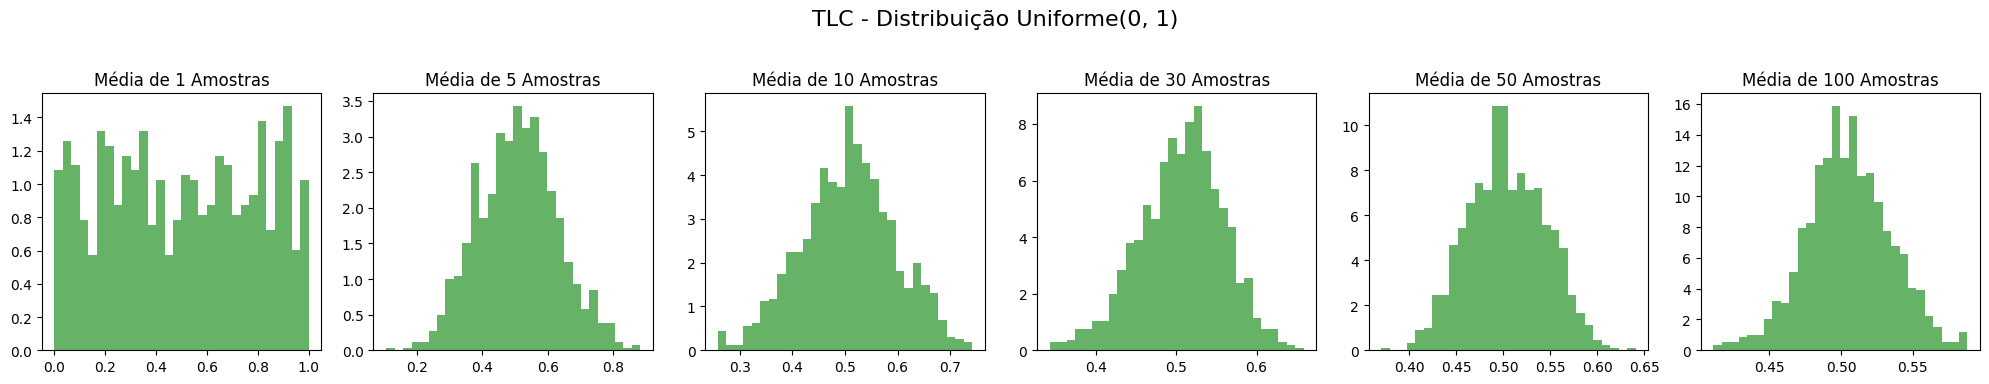

In [9]:


# Parâmetros
n_samples = 1000  # Número de amostras
sample_sizes = [1, 5, 10, 30, 50, 100]  # Tamanhos das amostras

# Distribuição Uniforme(0, 1)
uniform_data = np.random.uniform(0, 1, n_samples)

# Plotando histogramas para diferentes tamanhos de amostra
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(20, 4))
fig.suptitle("TLC - Distribuição Uniforme(0, 1)", fontsize=16)

for col, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(uniform_data, size)) for _ in range(n_samples)]
    axs[col].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[col].set_title(f"Média de {size} Amostras")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Distribuição Exponencial

Usada para modelar tempo de falha de um equipamento.

Exemplo: o tempo de vida de um chip. A falta de memória significa que o equipamento não desgasta. Independente de quanto tempo o equipamento tenha operado a probabilidade de falha não muda.

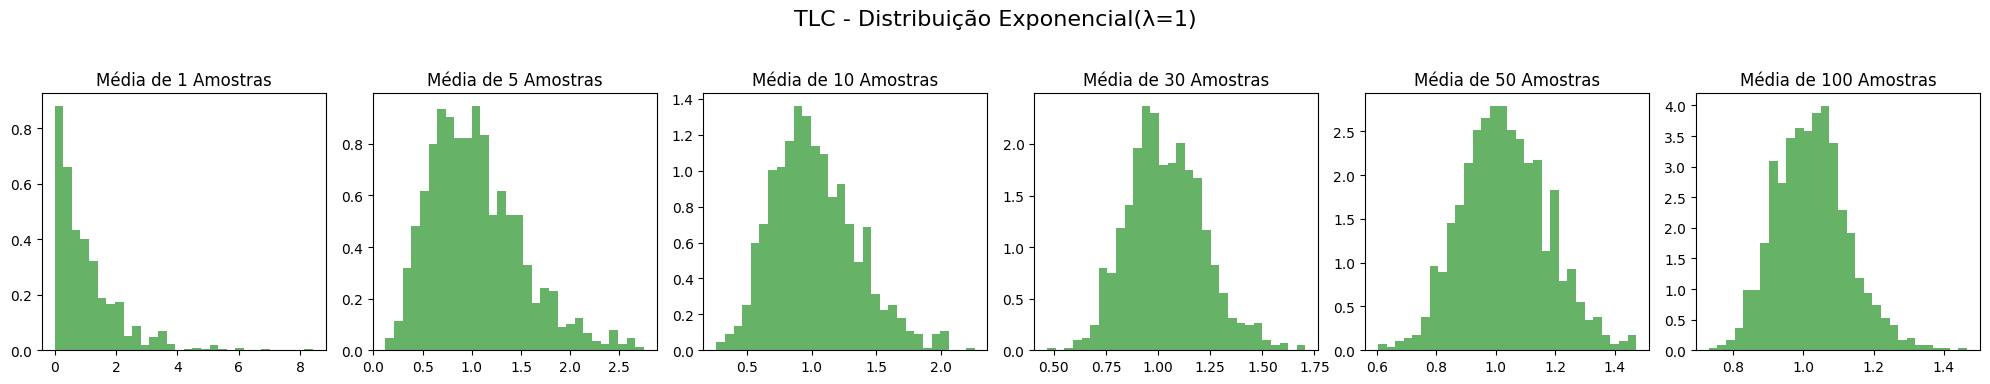

In [10]:


# Parâmetros
n_samples = 1000  # Número de amostras
sample_sizes = [1, 5, 10, 30, 50, 100]  # Tamanhos das amostras

# Distribuição Exponencial(λ=1)
exponential_data = np.random.exponential(1, n_samples)

# Plotando histogramas para diferentes tamanhos de amostra
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(20, 4))
fig.suptitle("TLC - Distribuição Exponencial(λ=1)", fontsize=16)

for col, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(exponential_data, size)) for _ in range(n_samples)]
    axs[col].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[col].set_title(f"Média de {size} Amostras")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Distribuição Binomial

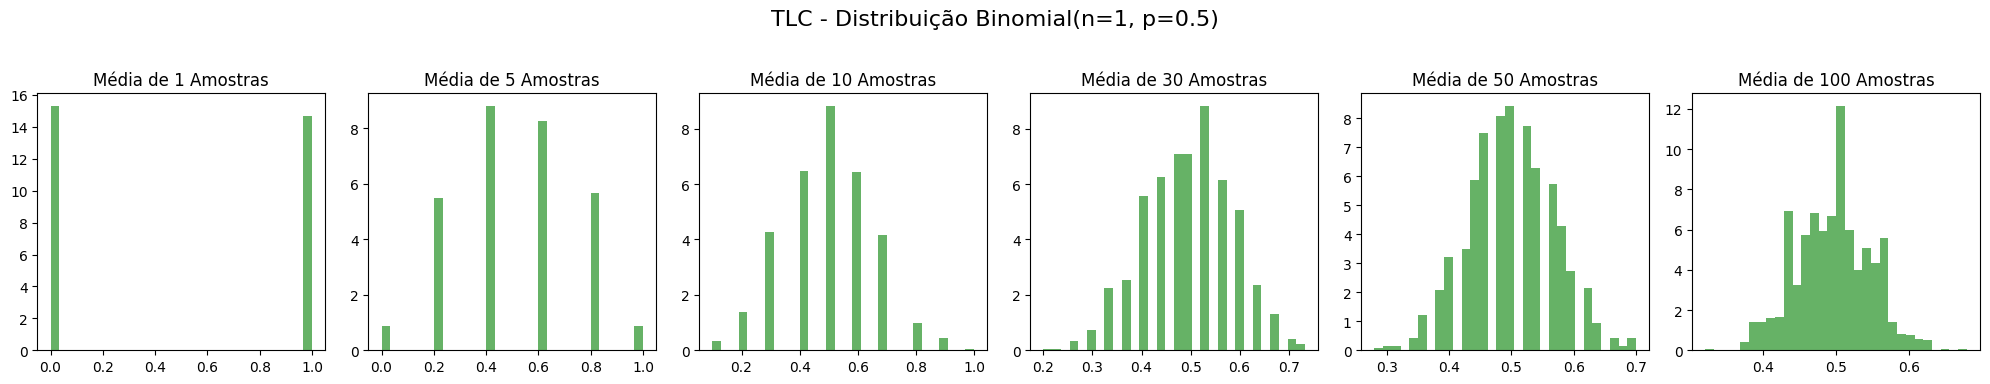

In [11]:


# Parâmetros
n_samples = 1000  # Número de amostras
sample_sizes = [1, 5, 10, 30, 50, 100]  # Tamanhos das amostras

# Distribuição Binomial(n=1, p=0.5)
binomial_data = np.random.binomial(1, 0.5, n_samples)

# Plotando histogramas para diferentes tamanhos de amostra
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(20, 4))
fig.suptitle("TLC - Distribuição Binomial(n=1, p=0.5)", fontsize=16)

for col, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(binomial_data, size)) for _ in range(n_samples)]
    axs[col].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[col].set_title(f"Média de {size} Amostras")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Distribuição de Poisson

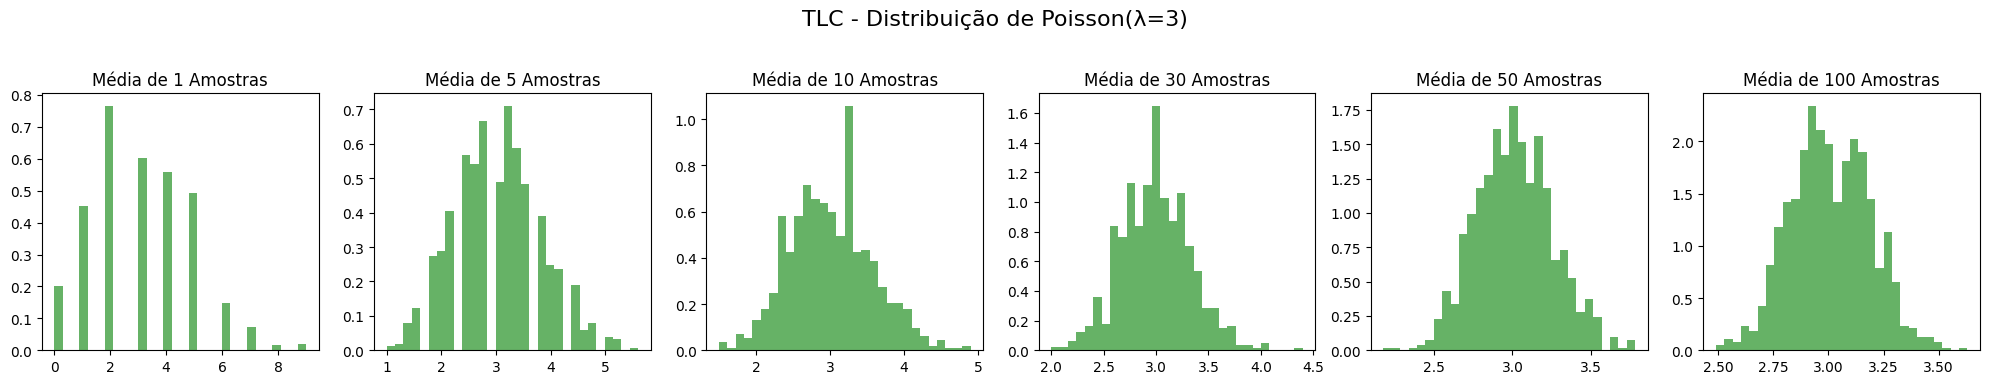

In [12]:


# Parâmetros
n_samples = 1000  # Número de amostras
sample_sizes = [1, 5, 10, 30, 50, 100]  # Tamanhos das amostras

# Distribuição de Poisson(λ=3)
poisson_data = np.random.poisson(3, n_samples)

# Plotando histogramas para diferentes tamanhos de amostra
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(20, 4))
fig.suptitle("TLC - Distribuição de Poisson(λ=3)", fontsize=16)

for col, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(poisson_data, size)) for _ in range(n_samples)]
    axs[col].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[col].set_title(f"Média de {size} Amostras")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Distribuição Lognormal

Usada para modelar variáveis não negativas com assimetria positiva. É importante na análise de variáveis que apresentam assimetria positiva, como, por exemplo, a ocorrência de fenômenos raros (terremotos) e a distribuição de metais nobres (ouro, prata etc.).

Oocorre quando o logaritmo de uma variável aleatória x tem a forma de uma distribuição normal. Uma das características mais importantes desta distribuição é não admitir dados negativos.

As transformações logarítmicas são frequentemente utilizadas para transformar dados que apresentam assimetria ou outras irregularidades, tornando mais fácil analisar, visualizar e interpretar os resultados

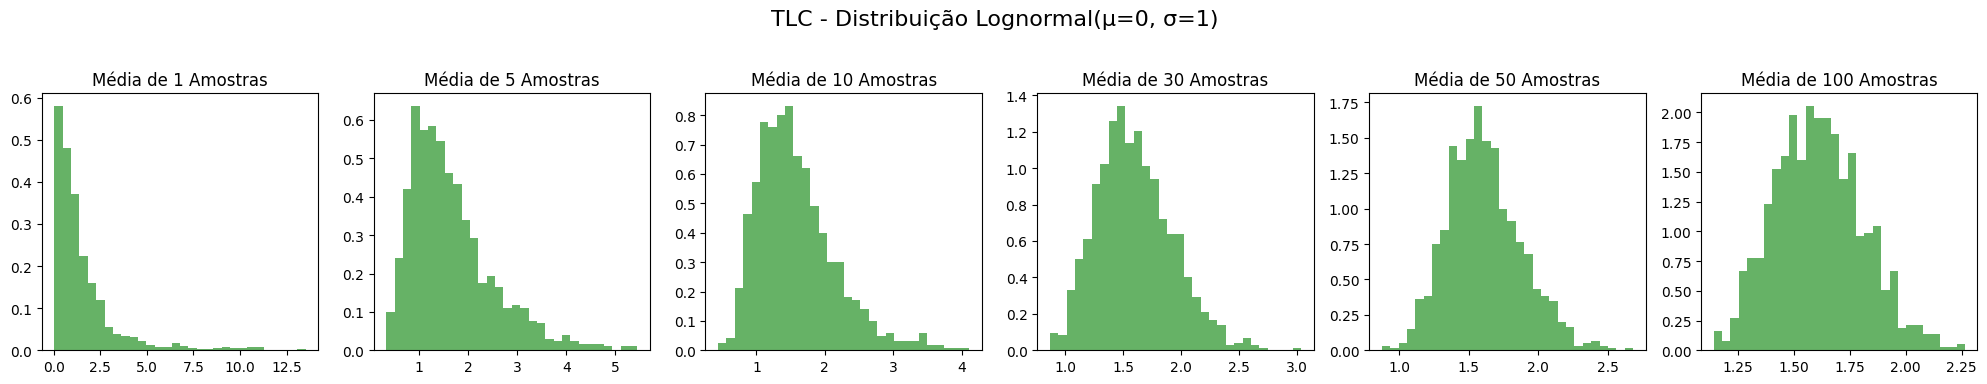

In [13]:
# Parâmetros
n_samples = 1000  # Número de amostras
sample_sizes = [1, 5, 10, 30, 50, 100]  # Tamanhos das amostras

# Distribuição Lognormal(µ=0, σ=1)
lognormal_data = np.random.lognormal(0, 1, n_samples)

# Plotando histogramas para diferentes tamanhos de amostra
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(20, 4))
fig.suptitle("TLC - Distribuição Lognormal(µ=0, σ=1)", fontsize=16)

for col, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(lognormal_data, size)) for _ in range(n_samples)]
    axs[col].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[col].set_title(f"Média de {size} Amostras")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Distribuição de Cauchy

Conhecida como distribuição de Lorentz, é contínua, não tem média nem variância definidas.

Usada em fenômenos físicos e naturais, como ressonâncias, distribuição de energias.

Na análise de outliers, teoria das filas, entre outros.

$$f(x; x_0, \gamma) = \frac{1}{\pi \gamma \left[1 + \left(\frac{x - x_0}{\gamma}\right)^2\right]}$$

Onde:
\(  \) é o parâmetro de localização, que indica o pico da distribuição (mediana). $\gamma$ é o parâmetro de escala, que define a largura da "campainha".

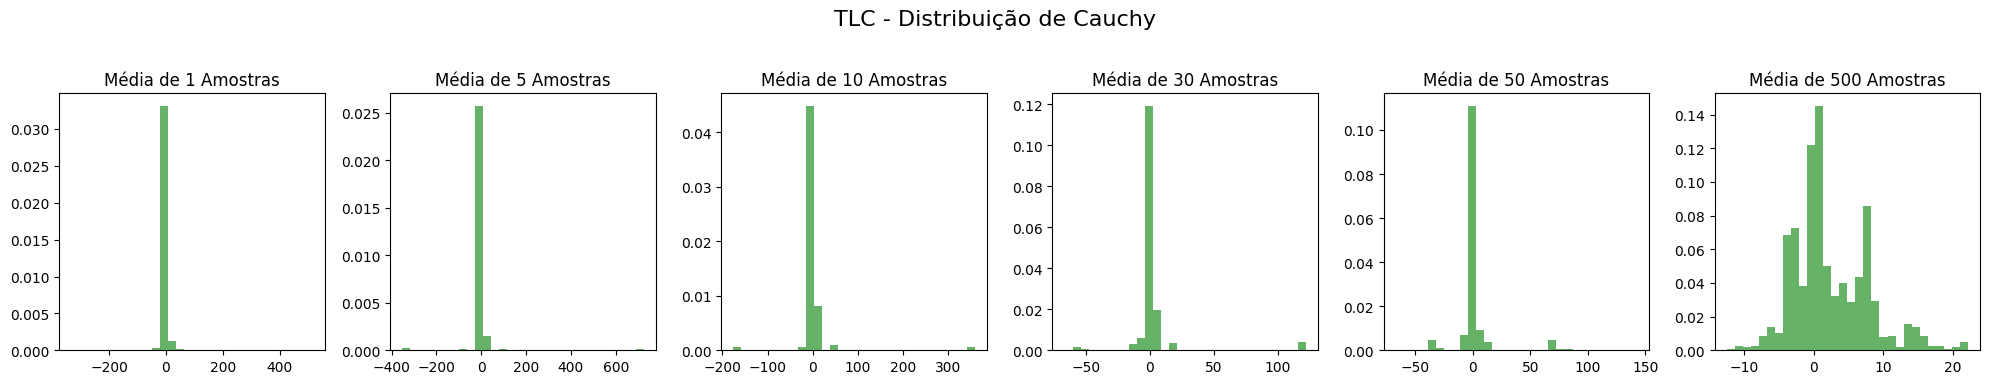

In [14]:
# Parâmetros
n_samples = 1000  # Número de amostras
sample_sizes = [1, 5, 10, 30, 50, 500]  # Tamanhos das amostras

# Distribuição de Cauchy
cauchy_data = np.random.standard_cauchy(n_samples)

# Plotando histogramas para diferentes tamanhos de amostra
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(20, 4))
fig.suptitle("TLC - Distribuição de Cauchy", fontsize=16)

for col, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(cauchy_data, size)) for _ in range(n_samples)]
    axs[col].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[col].set_title(f"Média de {size} Amostras")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Distribuição Normal

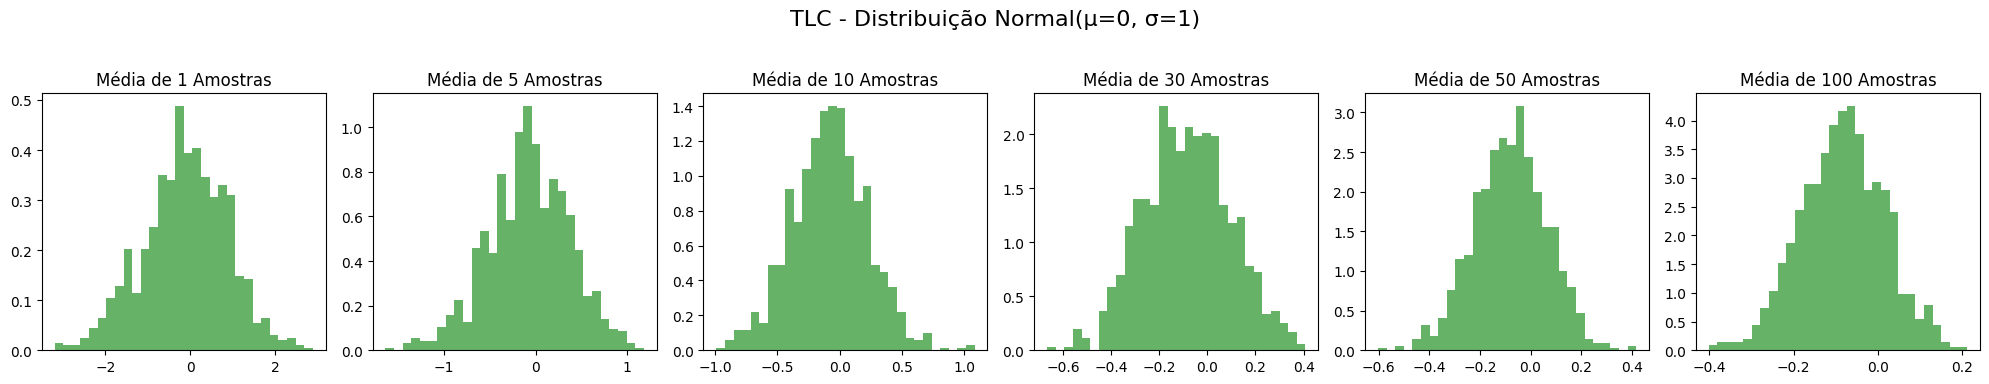

In [15]:
# Parâmetros
n_samples = 1000  # Número de amostras
sample_sizes = [1, 5, 10, 30, 50, 100]  # Tamanhos das amostras

# Distribuição Normal(µ=0, σ=1)
normal_data = np.random.normal(0, 1, n_samples)

# Plotando histogramas para diferentes tamanhos de amostra
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(20, 4))
fig.suptitle("TLC - Distribuição Normal(µ=0, σ=1)", fontsize=16)

for col, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(normal_data, size)) for _ in range(n_samples)]
    axs[col].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[col].set_title(f"Média de {size} Amostras")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Usando Kaggle

https://www.kaggle.com/datasets/ianpetrustan/global-temperature-time-series

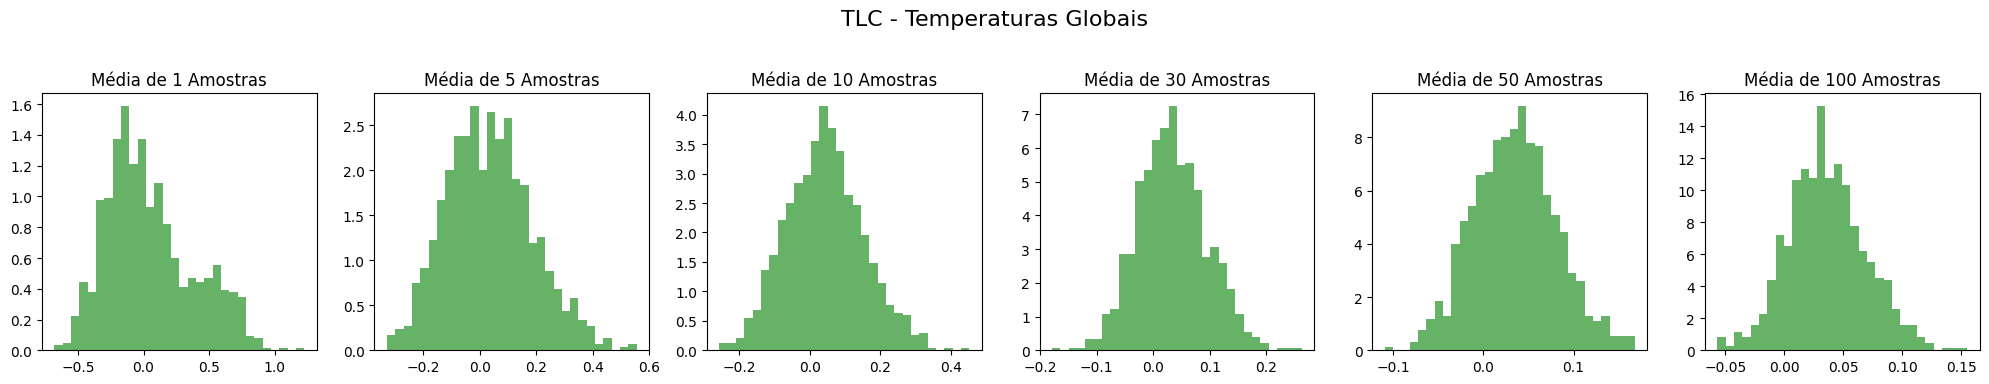

In [16]:
import pandas as pd

# Carregar o conjunto de dados
data = pd.read_csv('./monthly_csv.csv')

# Selecionar a coluna de interesse (por exemplo, a média global da temperatura de terra)
temperatures = data['Mean'].dropna()

# Parâmetros
n_samples = 1000  # Número de amostras
sample_sizes = [1, 5, 10, 30, 50, 100]  # Tamanhos das amostras

# Plotando histogramas para diferentes tamanhos de amostra
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(20, 4))
fig.suptitle("TLC - Temperaturas Globais", fontsize=16)

for col, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(temperatures, size)) for _ in range(n_samples)]
    axs[col].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[col].set_title(f"Média de {size} Amostras")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()